# Morse Decoder

An attempt at decoding morse code without machine learning

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
import scipy.signal as signal
import scipy.fft as fft

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [19]:
input_wav = "./data/hello.wav"
sample_rate, audio = sample_rate, samples = wav.read(input_wav)
morse_msg = input_wav.split('/')[-1].split('.')[0].upper()

print('morse message:', morse_msg)
print('sample rate:', sample_rate)
print('audio:', audio)
print(audio.shape, audio.dtype)

morse message: HELLO
sample rate: 8000
audio: [128 131 145 ... 128 128 128]
(23920,) uint8


In [23]:
print(audio[0:500])

[128 131 145 171 203 227 236 223 189 141  88  43  12   4  20  55 105 158
 206 240 252 242 211 165 112  62  24   5   9  35  78 130 182 224 248 250
 230 191 141  88  42  13   4  18  53 101 154 202 237 252 244 215 169 116
  66  26   6   8  32  73 125 177 220 247 251 233 195 146  93  46  14   4
  16  49  96 149 198 235 252 246 218 174 121  70  29   7   7  29  69 120
 173 217 245 252 235 200 150  97  50  17   4  14  45  91 144 194 232 251
 247 221 178 126  74  32   8   6  26  65 115 168 214 243 252 238 203 155
 102  54  19   4  12  41  87 140 190 230 250 248 224 183 131  79  36   9
   5  23  61 110 163 210 242 252 240 207 160 107  58  21   4  10  38  82
 135 186 227 249 249 227 187 136  83  39  11   4  21  56 106 159 206 239
 252 242 211 165 112  62  24   5   9  35  78 130 182 224 248 250 230 191
 141  88  42  13   4  18  53 101 154 202 237 252 244 215 169 116  66  26
   6   8  32  73 125 177 220 247 251 233 195 146  93  46  14   4  16  49
  96 149 198 235 252 246 218 174 121  70  29   7   

Text(0, 0.5, 'Magnitude')

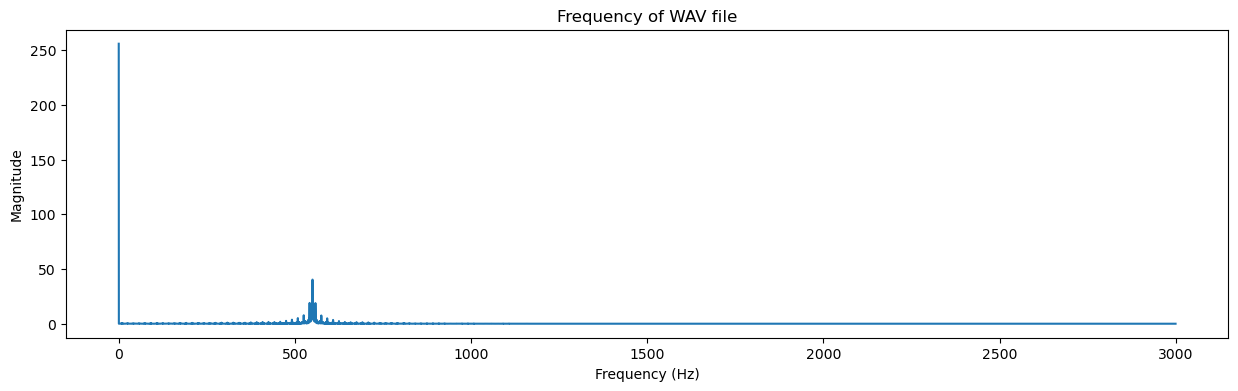

In [24]:
t = np.arange(len(audio)) / sample_rate
yf = 2.0 / len(audio) * np.abs(fft.fft(audio)[:len(audio) // 2])
xf = fft.fftfreq(len(audio), 1 / sample_rate)[:len(audio) // 2]

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(xf[xf < 3000], yf[xf < 3000])
ax.set_title('Frequency of WAV file')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

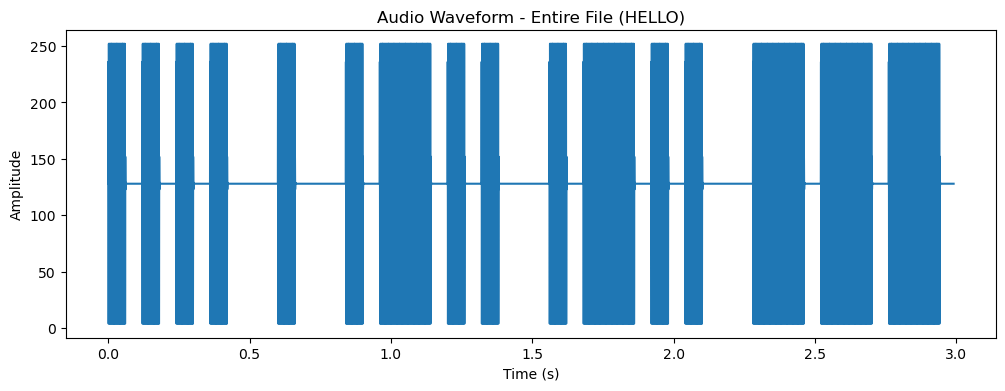

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(audio)) / sample_rate, audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Audio Waveform - Entire File ({morse_msg})')

plt.show()

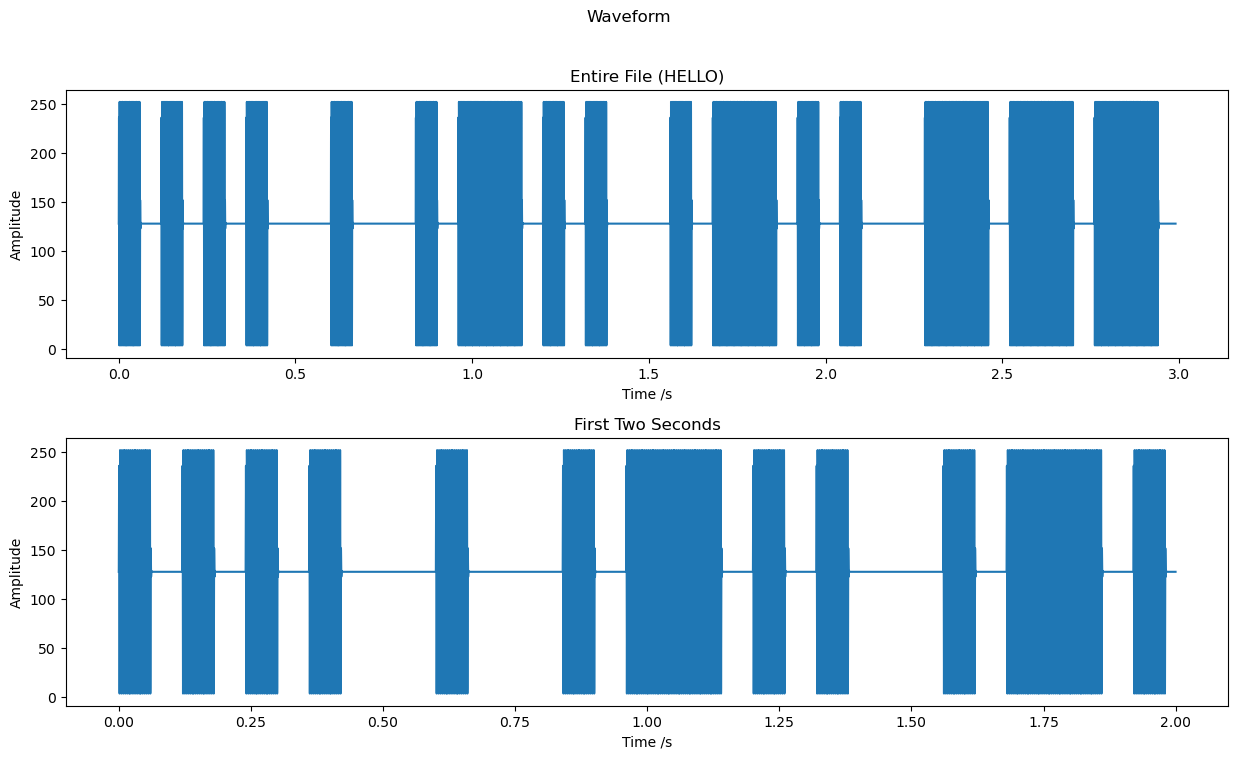

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))
plt.subplots_adjust(hspace=0.3)

axes[0].plot(t, audio)
axes[1].plot(t[:sample_rate * 2], audio[:sample_rate * 2])

fig.suptitle("Waveform")
axes[0].set_title(f"Entire File ({morse_msg})")
axes[1].set_title("First Two Seconds")

for ax in axes:
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time /s")


In [40]:
# smooth audio signal - square wave

peaks, _ = signal.find_peaks(audio, height=0.5, distance=35)

square_wave = np.zeros_like(audio)
square_wave[peaks] = 1

# Define a low-pass filter
cutoff_frequency = 500
nyquist = 0.5 * sample_rate
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(1, normal_cutoff, btype='low', analog=False)

# Apply the filter
smoothed_audio = signal.filtfilt(b, a, square_wave)

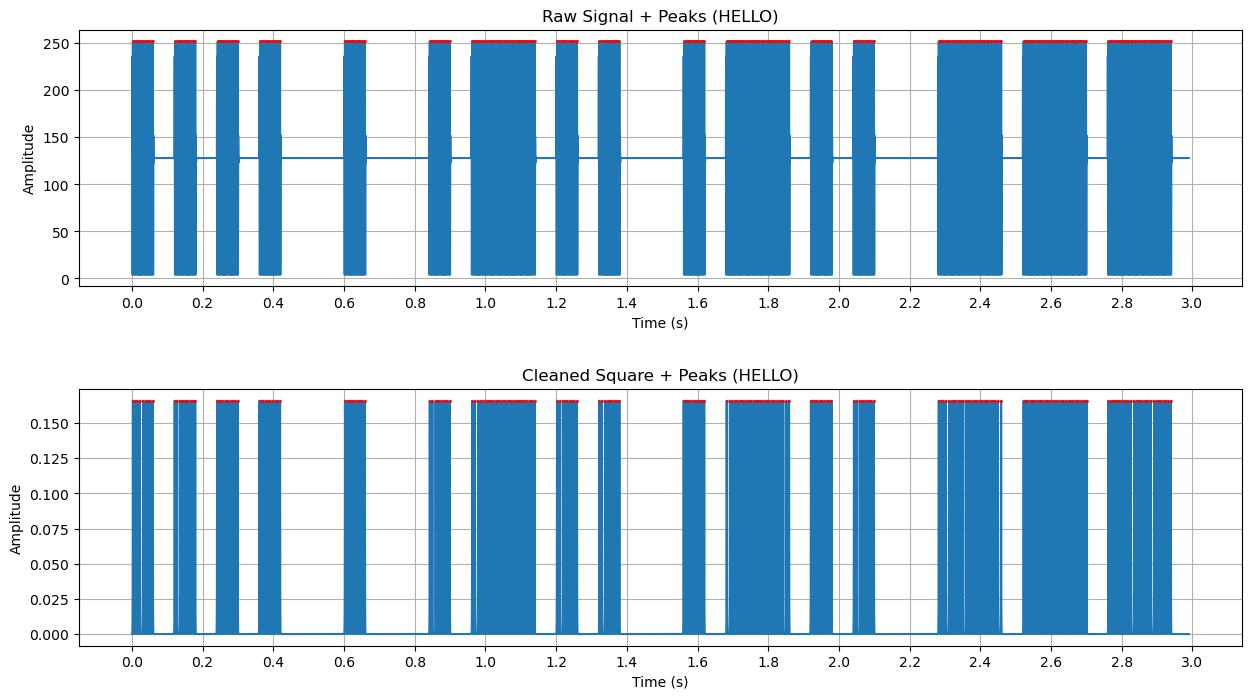

In [43]:
start, end = 0, 25000
ticks = 25

min_distance = 20

plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

waveform = audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=150, distance=min_distance)

plt.subplot(2, 1, 1)
plt.title(f"Raw Signal + Peaks ({morse_msg})")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=ticks)
plt.grid()

waveform = smoothed_audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=0.1, distance=min_distance)

plt.subplot(2, 1, 2)
plt.title(f"Cleaned Square + Peaks ({morse_msg})")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()

plt.show()

![data/hello-audacity.png](data/hello-audacity.png)

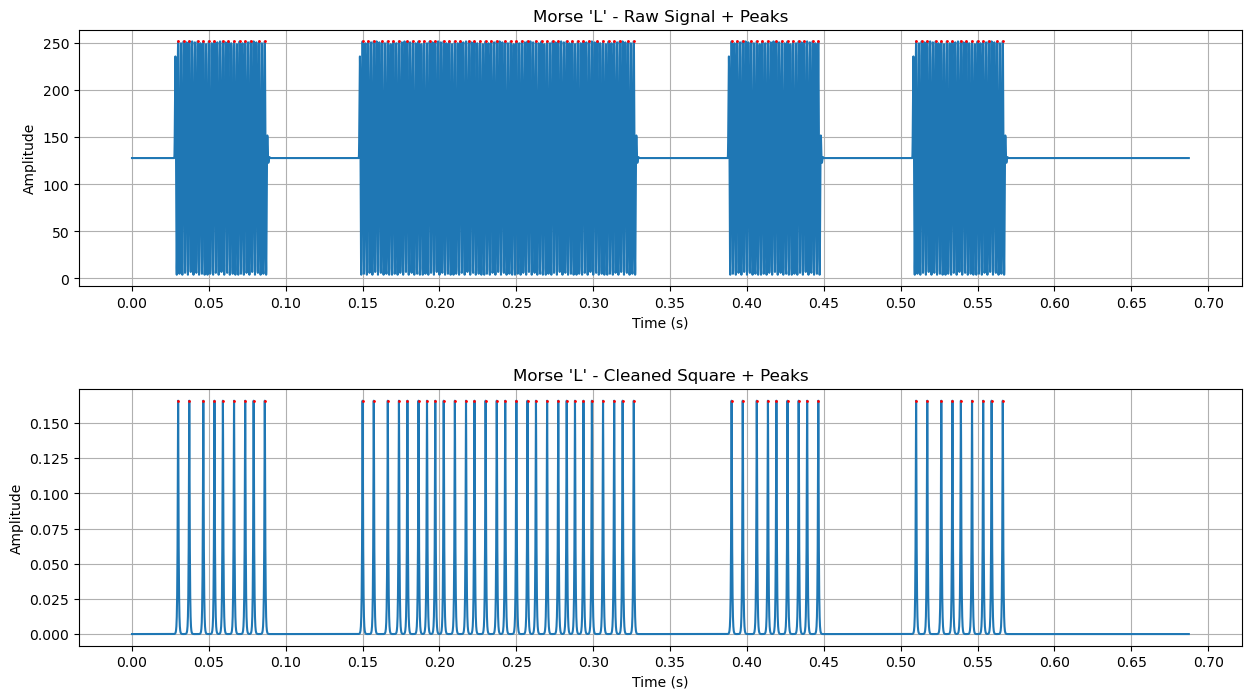

In [67]:
start, end = 6500, 12000
ticks = 25
target_letter = 'L'

min_distance = 20

plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

waveform = audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=150, distance=min_distance)

plt.subplot(2, 1, 1)
plt.title(f"Morse '{target_letter}' - Raw Signal + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=ticks)
plt.grid()

waveform = smoothed_audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=0.1, distance=min_distance)

plt.subplot(2, 1, 2)
plt.title(f"Morse '{target_letter}' - Cleaned Square + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()

plt.show()

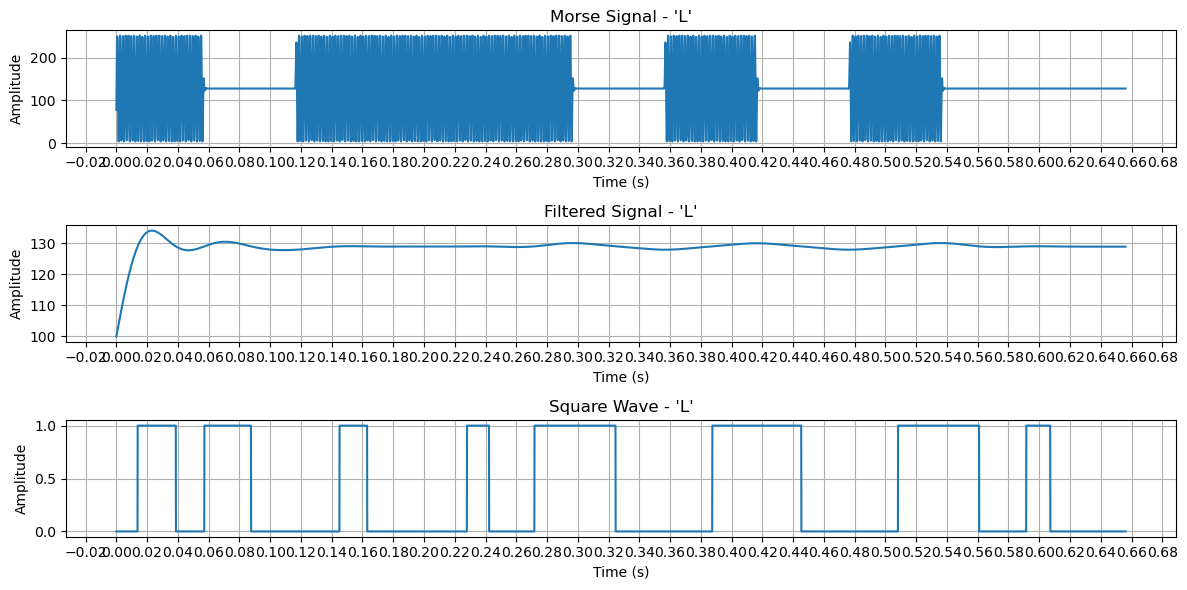

In [81]:
morse_signal = audio[6750:12000]
target_letter = 'L'

cutoff_frequency = 20
filter_order = 6

t = np.arange(len(morse_signal)) / sample_rate

b, a = signal.butter(filter_order, cutoff_frequency, fs=sample_rate, btype='lowpass')
filtered_wave = signal.filtfilt(b, a, 1 - morse_signal)

threshold = 129
square_wave = (filtered_wave > threshold).astype(int)

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, morse_signal)
plt.title(f"Morse Signal - '{target_letter}'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, filtered_wave)
plt.title(f"Filtered Signal - '{target_letter}'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, square_wave)
plt.title(f"Square Wave - '{target_letter}'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.tight_layout()
plt.show()

In [61]:
dot_duration = 0.075
dash_duration = 0.15
space_duration = 0.3

def audio_to_square_wave(morse_signal, sample_rate):
    cutoff_frequency = 20
    filter_order = 6
    t = np.arange(len(morse_signal)) / sample_rate
    b, a = signal.butter(filter_order, cutoff_frequency, fs=sample_rate, btype='lowpass')
    filtered_wave = signal.filtfilt(b, a, 1 - morse_signal)
    threshold = 129
    square_wave = (filtered_wave > threshold).astype(int)
    return square_wave

def square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration):
    square_diff = np.diff(square_wave)
    t = np.arange(len(morse_signal)) / sample_rate
    
    rising_idx = np.nonzero(square_diff == 1)[0]
    falling_idx = np.nonzero(square_diff == -1)[0]

    rise_times = t[rising_idx]
    fall_times = t[falling_idx]

    morse_code = []
    for rise_time, fall_time in zip(rise_times, fall_times):
        duration = fall_time - rise_time

        if duration < dot_duration:
            morse_code.append('.')
        elif duration < dash_duration:
            morse_code.append('-')
        elif duration < space_duration:
            morse_code.append(' ')
        else:
            morse_code.append('|')
    return ''.join(morse_code)

morse_mapping = {
    '.-': 'A', '-...': 'B', '-.-.': 'C', '-..': 'D', '.': 'E',
    '..-.': 'F', '--.': 'G', '....': 'H', '..': 'I', '.---': 'J',
    '-.-': 'K', '.-..': 'L', '--': 'M', '-.': 'N', '---': 'O',
    '.--.': 'P', '--.-': 'Q', '.-.': 'R', '...': 'S', '-': 'T',
    '..-': 'U', '...-': 'V', '.--': 'W', '-..-': 'X', '-.--': 'Y',
    '--..': 'Z', '-----': '0', '.----': '1', '..---': '2', '...--': '3',
    '....-': '4', '.....': '5', '-....': '6', '--...': '7', '---..': '8',
    '----.': '9', '/': ' ', '': ' '
}

def morse_to_text(morse_code):
    words = morse_code.split('|')
    decoded = ''
    
    for word in words:
        letters = word.split()
        for letter in letters:
            if letter in morse_mapping:
                decoded += morse_mapping[letter]
            else:
                decoded += '?'
        decoded += ' '
    return decoded.strip()

In [62]:
morse_signal = audio[2000:8000]

square_wave = audio_to_square_wave(morse_signal, sample_rate)

morse = square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration)
print('Morse', '[' + str(len(morse)) + ']:', morse)

decoded = morse_to_text(morse)
print("Decoded:  ", decoded)

Morse [9]: .........
Decoded:   ?


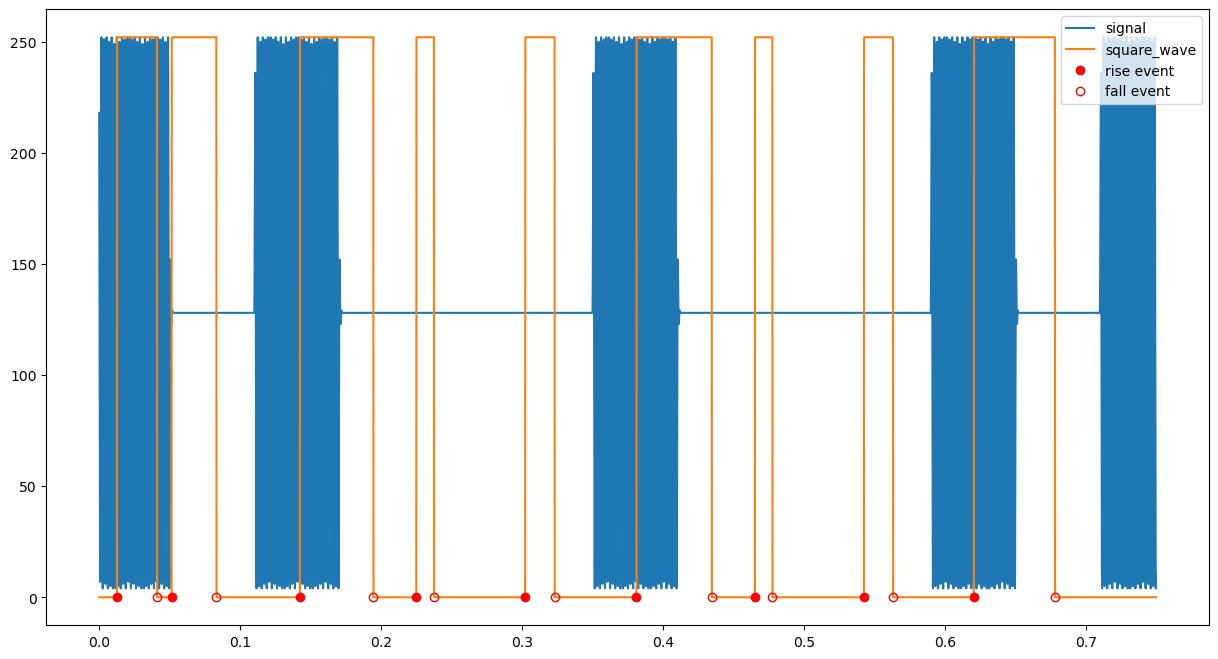

In [63]:
morse_signal = audio[2000:8000]
t = np.arange(len(morse_signal)) / sample_rate

square_wave = audio_to_square_wave(morse_signal, sample_rate)
square_diff = np.diff(square_wave)

rising_idx = np.nonzero(square_diff == 1)[0]
falling_idx = np.nonzero(square_diff == -1)[0]

rise_times = t[rising_idx]
fall_times = t[falling_idx]

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(t[:sample_rate*2], morse_signal[:sample_rate*2], label="signal")
ax.plot(t[:sample_rate*2], square_wave[:sample_rate*2]*max(morse_signal), label="square_wave")

ax.plot(rise_times[rise_times<2], np.zeros(sum(rise_times<2)), "ro", label="rise event")
ax.plot(fall_times[fall_times<2], np.zeros(sum(fall_times<2)), "ro", fillstyle="none", label="fall event")

ax.legend()

In [64]:
morse_signal = audio[0:20100]

square_wave = audio_to_square_wave(morse_signal, sample_rate)

morse = square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration)
print('Morse', '[' + str(len(morse)) + ']:', morse)

decoded = morse_to_text(morse)
print("Decoded:  ", decoded)

Morse [29]: .............................
Decoded:   ?


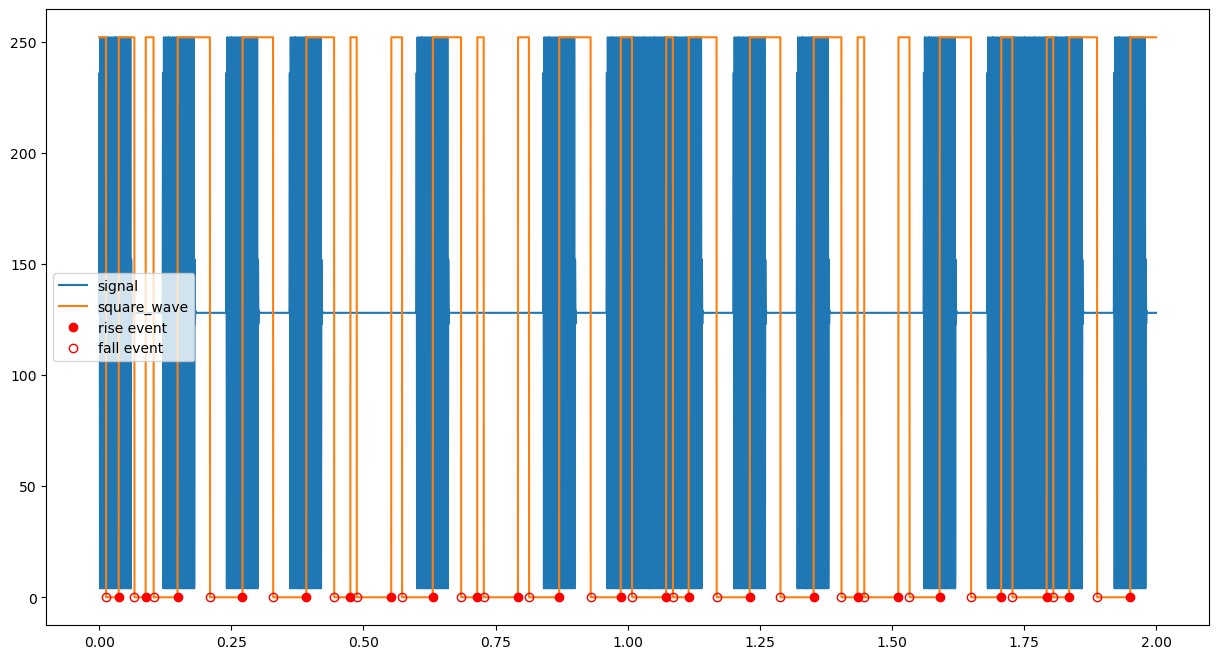

In [65]:
morse_signal = audio[0:20100]
t = np.arange(len(morse_signal)) / sample_rate

square_wave = audio_to_square_wave(morse_signal, sample_rate)
square_diff = np.diff(square_wave)

rising_idx = np.nonzero(square_diff == 1)[0]
falling_idx = np.nonzero(square_diff == -1)[0]

rise_times = t[rising_idx]
fall_times = t[falling_idx]

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(t[:sample_rate*2], morse_signal[:sample_rate*2], label="signal")
ax.plot(t[:sample_rate*2], square_wave[:sample_rate*2]*max(morse_signal), label="square_wave")

ax.plot(rise_times[rise_times<2], np.zeros(sum(rise_times<2)), "ro", label="rise event")
ax.plot(fall_times[fall_times<2], np.zeros(sum(fall_times<2)), "ro", fillstyle="none", label="fall event")

ax.legend()